In [76]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("science")
from scipy import stats
import seaborn as sns

## Gaussians

In [91]:
n = 1000
x = 2 * np.random.randn(n) + 1
y = 3 * np.random.randn(n) + 30
alpha = stats.norm(1, 2)
beta = stats.norm(30, 3)

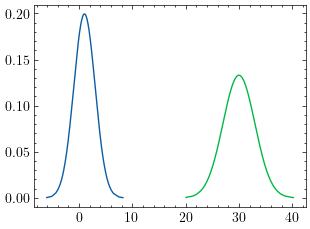

In [92]:
x.sort()
y.sort()
plt.plot(x, alpha.pdf(x))
plt.plot(y, beta.pdf(y))
plt.show()

## Wasserstein Geodesic

$$F_t(x,y) = (1-t)x + t y$$

with distributions

$$P_{t} = T_{t\#} J , P_0 = \alpha \text{ and } P_1 = \beta$$

where $J$ is the optimal coupling

In [93]:
def geodesic(t):
    return np.array([(1-t)*_x + t * _y for (_x, _y) in zip(x,y)])

In [94]:
z1 = geodesic(0.2)
z2 = geodesic(0.5)
z3 = geodesic(0.8)

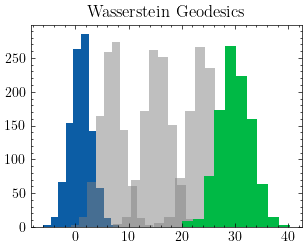

In [95]:
plt.hist(x)
plt.hist(z1, color = "grey", alpha = 0.5)
plt.hist(z2, color = "grey", alpha = 0.5)
plt.hist(z3, color = "grey", alpha = 0.5)
plt.hist(y)
plt.title("Wasserstein Geodesics")
plt.show()

In [96]:
z1_density = stats.gaussian_kde(z1)
z2_density = stats.gaussian_kde(z2)
z3_density = stats.gaussian_kde(z3)

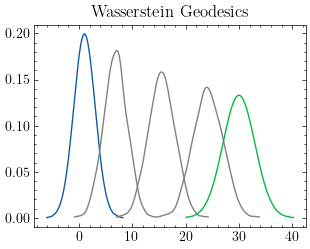

In [97]:
plt.plot(x, alpha.pdf(x))
plt.plot(z1, z1_density.pdf(z1), color = "grey")
plt.plot(z2, z2_density.pdf(z2), color = "grey")
plt.plot(z3, z3_density.pdf(z3), color = "grey")
plt.plot(y, beta.pdf(y))
plt.title("Wasserstein Geodesics")
plt.show()

## Morphing images

In [98]:
from sklearn.datasets import load_digits

In [130]:
data = load_digits()["data"]
target = load_digits()["target"]
m = 8

**Morphing an image into another**

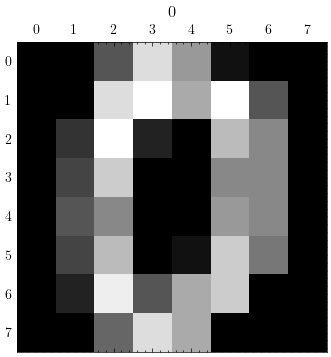

In [133]:
plt.matshow(data[0].reshape(m,m), cmap = plt.cm.gray)
plt.title(target[0])
plt.show()

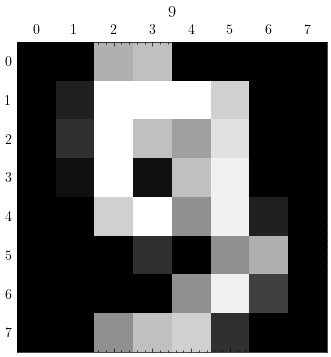

In [141]:
plt.matshow(data[9].reshape(m,m), cmap = plt.cm.gray)
plt.title(target[9])
plt.show()

In [142]:
x = data[0]
y = data[9]

In [145]:
z1 = geodesic(0.2)
z2 = geodesic(0.5)
z3 = geodesic(0.8)

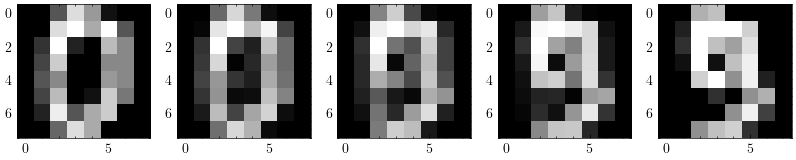

In [161]:
fig, axes = plt.subplots(1, 5, figsize= (10, 10))
axes[0].imshow(x.reshape(m,m), cmap = plt.cm.gray)
axes[1].imshow(z1.reshape(m,m), cmap = plt.cm.gray)
axes[2].imshow(z2.reshape(m,m), cmap = plt.cm.gray)
axes[3].imshow(z3.reshape(m,m), cmap = plt.cm.gray)
axes[4].imshow(y.reshape(m,m), cmap = plt.cm.gray)
plt.show()